In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduates-admission-prediction/admission_data.csv


In [2]:
df=pd.read_csv('../input/graduates-admission-prediction/admission_data.csv')

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df['Chance of Admit ']=np.where(df['Chance of Admit ']>0.72,1,df['Chance of Admit '])
df['Chance of Admit ']=np.where(df['Chance of Admit ']<=0.72,0,df['Chance of Admit '])

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.496000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.500485
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [9]:
X=df.drop(["Chance of Admit ",],axis=1)
y=df['Chance of Admit ']

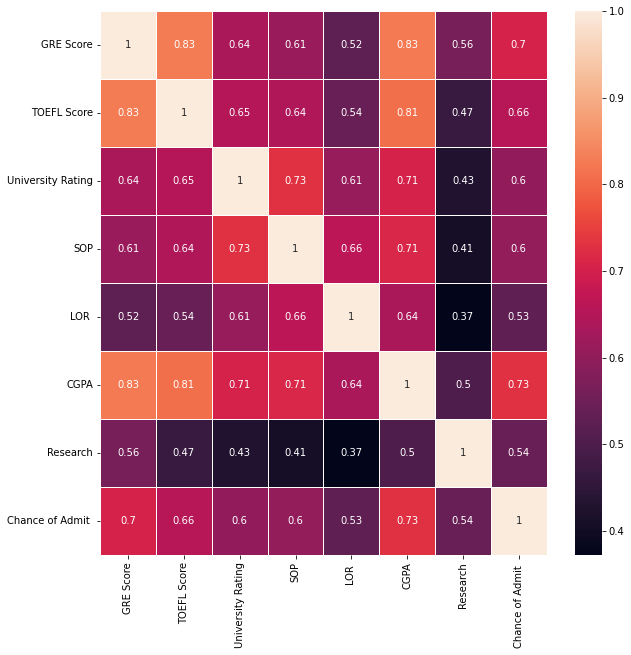

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

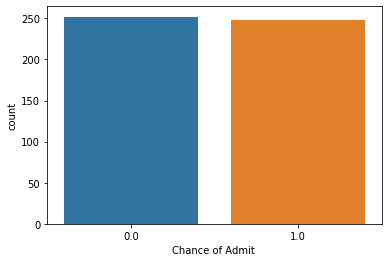

In [11]:
sns.countplot(x='Chance of Admit ',data=df)

> ***WE NOW HAVE AN EQUALLY DISTRIBUTED DATASET***

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.17,random_state=0)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
326,299,100,3,2.0,2.0,8.02,0
421,321,112,3,3.0,4.5,8.95,1
157,309,104,2,2.0,2.5,8.26,0
348,302,99,1,2.0,2.0,7.25,0
54,322,110,3,3.0,3.5,8.00,0
...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0
192,322,114,5,4.5,4.0,8.94,1
117,290,104,4,2.0,2.5,7.46,0
47,339,119,5,4.5,4.0,9.70,0


In [14]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,318,106,2,4.0,4.0,7.92,1
254,321,114,4,4.0,5.0,9.12,0
283,321,111,3,2.5,3.0,8.90,1
445,328,116,5,4.5,5.0,9.08,1
461,301,102,3,2.5,2.0,8.13,1
...,...,...,...,...,...,...,...
300,309,106,2,2.5,2.5,8.00,0
235,326,111,5,4.5,4.0,9.23,1
475,300,101,3,3.5,2.5,7.88,0
219,312,104,3,3.5,3.5,8.42,0


In [15]:
y_train

326    0.0
421    1.0
157    0.0
348    0.0
54     0.0
      ... 
323    0.0
192    1.0
117    0.0
47     1.0
172    1.0
Name: Chance of Admit , Length: 415, dtype: float64

In [16]:
y_test

90     0.0
254    1.0
283    1.0
445    1.0
461    0.0
      ... 
300    0.0
235    1.0
475    0.0
219    1.0
330    1.0
Name: Chance of Admit , Length: 85, dtype: float64

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[41  5]
 [ 6 33]]
0.8705882352941177
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        46
         1.0       0.87      0.85      0.86        39

    accuracy                           0.87        85
   macro avg       0.87      0.87      0.87        85
weighted avg       0.87      0.87      0.87        85



In [19]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,20)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 5,7,9,15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy', 'gini']}
print(random_grid)

{'n_estimators': [200, 347, 494, 642, 789, 936, 1084, 1231, 1378, 1526, 1673, 1821, 1968, 2115, 2263, 2410, 2557, 2705, 2852, 3000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 62, 114, 166, 218, 270, 322, 374, 426, 478, 531, 583, 635, 687, 739, 791, 843, 895, 947, 1000], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 3, 5, 7, 9, 15], 'criterion': ['entropy', 'gini']}


In [20]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=62, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1378; total time=   4.2s
[CV] END criterion=gini, max_depth=583, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1378; total time=   4.1s
[CV] END criterion=gini, max_depth=843, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=2410; total time=   6.9s
[CV] END criterion=entropy, max_depth=583, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=2115; total time=   6.1s
[CV] END criterion=entropy, max_depth=374, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=1673; total time=   4.8s
[CV] END criterion=gini, max_depth=374, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=2263; total time=   6.9s
[CV] END criterion=entropy, max_depth=218, max_features=auto, min_samples_leaf=15, min_samples_split=

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 62, 114, 166, 218,
                                                      270, 322, 374, 426, 478,
                                                      531, 583, 635, 687, 739,
                                                      791, 843, 895, 947,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 347, 494, 642,
                                                         789, 936, 1084, 12

In [21]:
best_random_grid=rf_randomcv.best_estimator_

In [22]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=583, max_features='log2',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=642)

In [23]:
y_pred=best_random_grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[41  5]
 [ 6 33]]
0.8705882352941177
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        46
         1.0       0.87      0.85      0.86        39

    accuracy                           0.87        85
   macro avg       0.87      0.87      0.87        85
weighted avg       0.87      0.87      0.87        85



In [25]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[42  4]
 [ 6 33]]
0.8823529411764706
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        46
         1.0       0.89      0.85      0.87        39

    accuracy                           0.88        85
   macro avg       0.88      0.88      0.88        85
weighted avg       0.88      0.88      0.88        85



In [26]:
rf_randomcv.best_params_

{'n_estimators': 642,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 583,
 'criterion': 'entropy'}

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] +4,
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +2,
                          rf_randomcv.best_params_['min_samples_split'] + 3],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200,
    rf_randomcv.best_params_['n_estimators'] + 400,rf_randomcv.best_params_['n_estimators'] + 600, rf_randomcv.best_params_['n_estimators'] + 800]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [583], 'max_features': ['log2'], 'min_samples_leaf': [5, 7, 9], 'min_samples_split': [14, 11, 10, 12, 13], 'n_estimators': [442, 542, 642, 742, 842, 1042, 1242, 1442]}


In [28]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits

[CV] END criterion=entropy, max_depth=218, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=789; total time=   2.3s
[CV] END criterion=gini, max_depth=166, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=3000; total time=   8.8s
[CV] END criterion=gini, max_depth=114, max_features=log2, min_samples_leaf=7, min_samples_split=20, n_estimators=1084; total time=   3.2s
[CV] END criterion=gini, max_depth=791, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=1231; total time=   3.6s
[CV] END criterion=gini, max_depth=791, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=1231; total time=   3.9s
[CV] END criterion=entropy, max_depth=895, max_features=log2, min_samples_leaf=9, min_samples_split=15, n_estimators=936; total time=   2.8s
[CV] END criterion=entropy, max_depth=895, max_features=log2, min_samples_leaf=9, min_samples_split

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [583],
                         'max_features': ['log2'],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [14, 11, 10, 12, 13],
                         'n_estimators': [442, 542, 642, 742, 842, 1042, 1242,
                                          1442]},
             verbose=2)

In [29]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=583, max_features='log2',
                       min_samples_leaf=5, min_samples_split=11,
                       n_estimators=642)

In [30]:
best_grid=grid_search.best_estimator_

In [31]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=583, max_features='log2',
                       min_samples_leaf=5, min_samples_split=11,
                       n_estimators=642)

In [32]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[42  4]
 [ 6 33]]
Accuracy Score 0.8823529411764706
Classification report:               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        46
         1.0       0.89      0.85      0.87        39

    accuracy                           0.88        85
   macro avg       0.88      0.88      0.88        85
weighted avg       0.88      0.88      0.88        85



In [33]:
best_random_grid


RandomForestClassifier(criterion='entropy', max_depth=583, max_features='log2',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=642)

In [34]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=583, max_features='log2',
                       min_samples_leaf=5, min_samples_split=11,
                       n_estimators=642)